# Complex integration
```{index} Complex integration
```
Because of the added dimension in complex numbers compared to real numbers, where we integrated along an interval in $\mathbb{R}$, complex functions of complex variables are integrated along contours (or paths).

(comp_contours)=
## Contours

A continuous or piecewise continuous mapping $\gamma : [a,b] \to \mathbb{C}$ is called a **contour in $\mathbb{C}$**. Often the same notation $\gamma$ and the same name *contour* is used for its image. The contour is **closed** if $ \gamma (a) = \gamma (b) $ . The contour is **simple** if it does not intersect itself (but $ \gamma (a) = \gamma (b) $ is allowed). A **parameterisation** of a given contour in the complex plane is any $\gamma$ whose image matches the contour.

**Examples:**

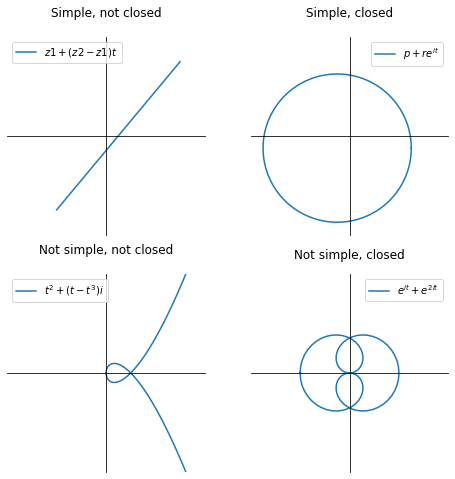

In [55]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, 201)
X, Y = np.meshgrid(x, x)
Z = X + 1j*Y

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

t = np.linspace(0, 1, 5)
z1 = -2 + -3j
z2 = 3 + 3j
gamma = z1 + (z2 - z1)*t
ax[0, 0].plot(gamma.real, gamma.imag, label='$z1 + (z2 - z1)t$')
ax[0, 0].set_title('Simple, not closed', pad=20)

t = np.linspace(0, 2*np.pi, 101)
gamma = -0.5 - 0.5j + 3 * np.exp(1j*t)
ax[0, 1].plot(gamma.real, gamma.imag, label='$p +re^{it}$')
ax[0, 1].set_title('Simple, closed', pad=20)

t = np.linspace(-np.pi, np.pi, 101)
gamma = t**2 + 1j * (t - t**3)
ax[1, 0].plot(gamma.real, gamma.imag, label='$t^2 + (t-t^3)i$')
ax[1, 0].set_title('Not simple, not closed', pad=20)

t = np.linspace(-np.pi, np.pi, 101)
gamma = np.exp(1j*t) + np.exp(3j*t)
ax[1, 1].plot(gamma.real, gamma.imag, label='$e^{it} + e^{2it}$')
ax[1, 1].set_title('Not simple, closed', pad=15)

for i in range(2):
    for j in range(2):
        ax[i, j].set_aspect('equal')
        ax[i, j].spines['left'].set_position('zero')
        ax[i, j].spines['bottom'].set_position('zero')
        ax[i, j].spines['right'].set_visible(False)
        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].set_xlim(-4, 4)
        ax[i, j].set_ylim(-4, 4)
        ax[i, j].legend(loc='best')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

plt.show()

A contour $\gamma = u + iv$ is **smooth** if the function $\gamma$ is differentiable and the derivative $\gamma '$ is continuous. From the previous notebook we concluded that for $\gamma$ to be continuous it is sufficient that $u$ and $v$ are continuous.

A contour $\gamma = u + iv$ is **piecewise smooth** if it is smooth everywhere on $[a,b]$ except for a finite number of points. That means that it can be broken into smaller pieces at these points such that all these pieces are smooth.

(comp_cont_int)=
## Contour integral

Let $\gamma : [a, b] \to \mathbb{C}$ be a smooth contour and let $f = u + iv : \gamma \to \mathbb{C}$ be a continuous function. The integral of the function $f$ along contour $\gamma$ is defined to be:

$$\int_{\gamma} f dz := \int_a^b f(\gamma(t)) \gamma' (t) dt. $$

If the contour is piecewise continuous, the integral of $f$ is a sum of integrals along these smaller smooth contours. 

```{tip}

From the above we could arrive at the following relation, which we will show by introducing $dz = dx + i dy$:

$$ \int_{\gamma} f dz = (u + iv)(dx + i dy) = \int_{\gamma} [u dx - v dy] + i \int_{\gamma} [v dx + u dy], $$

This means that

$$ \begin{aligned}
\text{Re} \left ( \int_{\gamma} f dz \right ) & = \int_{\gamma} \text{Re} (f dz) \\
\text{Im} \left ( \int_{\gamma} f dz \right ) & = \int_{\gamma} \text{Im} (f dz).
\end{aligned} $$

```

It is also important to define the **length** of $\gamma$:

$$ \mathcal{L}(\gamma) := \int_a^b | \gamma ' (t) | dt $$

This allows us to estimate integrals. If $f(z)$ is continuous on $\gamma$, then:

$$ \left | \int_{\gamma} f(z) dz \right | \leq M \mathcal{L} $$

where $M$ is an upper bound for $|f|$ on $\gamma$:

$$ M = \sup_{z \in \gamma} |f(z)| $$

Furthermore, the path integral $\int_{\gamma}$ is independent under reparametrisation of the path along which it is integrated.

### Example

Let us consider a simple integrated along two different paths with the same starting point $z_1 = 1$ and end point $z_2 = i$:

$$ \int_{\gamma} \frac{dz}{z}. $$

The paths are:

$$\gamma_1 (t) = 1 - t + it, \quad t \in [0, 1] \\
\gamma_2 (t) = e^{it}, \quad t \in [0, \pi / 2] $$ 

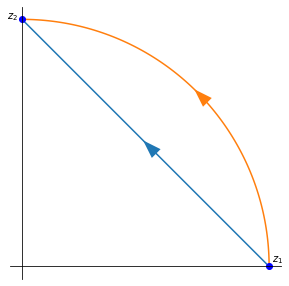

In [48]:
t = np.linspace(0, np.pi/2, 101)
g2 = np.exp(1j*t)

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plt.plot([1, 0], [0, 1])
plt.arrow(0.5, 0.5, -0.01, 0.01, shape='full', lw=0, length_includes_head=True, head_width=.05)

plt.plot(g2.real, g2.imag)
plt.arrow(g2.real[50], g2.imag[50], -0.01, 0.01, color='C1', shape='full', lw=0, length_includes_head=True, head_width=.05)

plt.plot([1, 0], [0, 1], 'bo')
plt.text(1.01, 0.02, '$z_1$')
plt.text(-0.06, 1, '$z_2$')

ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

1. path $\gamma_1$:

$$
f( \gamma_1 (t) ) = \frac{1}{1 - t + it}, \quad \gamma_1 ' (t) = -1 + i
$$

2. path $\gamma_2$:

$$
f( \gamma_2 (t) ) = \frac{1}{e^{it}}, \quad \gamma_2 ' (t) = i e^{it} \\
\int_{\gamma_2} \frac{dz}{z} = \int_0^{\pi/2} \frac{i e^{it}}{e^{it}} dt = i \int_0^{\pi/2} dt = \frac{\pi i}{2}
$$

When evaluating integrals along closed curves, the convention is to take the positive direction to be the one for which the interior of the curve is on the left as we move around the contour.

```{index} Cauchy's theorem
```

(comp_cauchy_th)=
## Cauchy's theorem

**Cauchy's theorem for path integrals.** Let $f$ be a holomorphic function in a domain $D$ and let $\gamma$ be a path from $p$ to $q$ in $D$. Then

$$ \int_{\gamma} f' dz = f(q) - f(p). $$

Specially, if $p = q$ then $\gamma$ is closed and

$$ \oint_{\gamma} f(z) dz = 0. $$

We therefore only require that $f$ is holomorphic inside and on the closed contour $\gamma$.